In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
pd.options.display.max_rows = 4000
pd.options.display.max_colwidth = 1000

In [6]:
import gensim
from gensim.models import Word2Vec
import pickle

In [7]:
WORD2VEC_MODEL = "./data/models/third/model.w2v"
TOKENIZER_MODEL = "./data/models/third/tokenizer.pkl"

In [8]:
from keras.models import load_model
w2v_model = Word2Vec.load(WORD2VEC_MODEL)
tokenizer = pickle.load(open(TOKENIZER_MODEL, "rb"))

In [13]:
w2v_model.similar_by_word('king')

/Users/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/Users/andy/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('leon', 0.5902729034423828),
 ('queen', 0.3778519034385681),
 ('larri', 0.37196019291877747),
 ('burger', 0.35293543338775635),
 ('yumyum', 0.3283902406692505),
 ('selah', 0.32379812002182007),
 ('roberta', 0.3237626552581787),
 ('dominion', 0.3235524892807007),
 ('lion', 0.3113180994987488),
 ('wieb', 0.3052942752838135)]

In [18]:
w2v_model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

/Users/andy/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.31095781922340393),
 ('leon', 0.3061104416847229),
 ('women', 0.2826709747314453),
 ('herd', 0.2652813494205475),
 ('chanel', 0.2609832286834717),
 ('innuendo', 0.25143253803253174),
 ('stun', 0.2503584921360016),
 ('bedsid', 0.2503155469894409),
 ('busk', 0.24080359935760498),
 ('stefan', 0.24031420052051544)]

In [15]:
# https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, word):
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/Users/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  if __name__ == '__main__':
/Users/andy/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/Users/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/Users/andy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


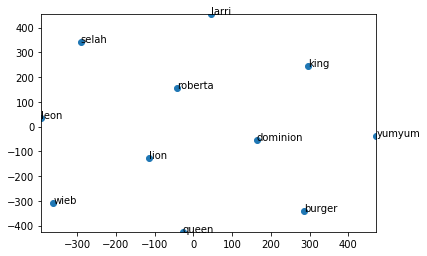

In [16]:
display_closestwords_tsnescatterplot(w2v_model, 'king')